In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def split_main_text(main_text):
    if pd.notna(main_text):
        main_text_list = main_text.split('\a')
        return main_text_list
    else:
        return []
    
def concat_cols(line):
    try:
        text = line["date"] + " " + line["main_text_splitted"]  # line["title"] + " " + " " + line["category"] + " " + line["headers"] + 
    except:
        text = line["date"] + " " + line["main_text_splitted"]
    return text

def clean_text(text):
    text = text.lower()  # Convert to lower case
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-printable characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    return text

In [3]:
df = pd.read_csv("../files/articles_V2.csv")

In [4]:
df['main_text_splitted'] = df['main_text'].apply(lambda x: split_main_text(x))
df = df.drop(['summary', 'main_text'], axis=1)
df = df[df['category'] == "Climate and Environment"]
df = df.reset_index(drop=True)

In [5]:
df

,link,title,date,category,headers,main_text_splitted
0,https://news.un.org//en/story/2023/10/1142552,"World News in Brief: Sandstorm alert, albinism...",19 October 2023,Climate and Environment,Hundreds killed and injured,[The UN World Meteorological Organization (WMO...
1,https://news.un.org//en/story/2023/10/1142317,"Cutting disaster risk will boost equality, imp...",13 October 2023,Climate and Environment,NaN,"[According to various estimates, up to 75 per ..."
2,https://news.un.org//en/story/2023/10/1142302,Tackling disasters means safer and fairer futu...,13 October 2023,Climate and Environment,UN Resident Coordinator:,"[Earthquakes, hurricanes, volcanic activity an..."
3,https://news.un.org//en/story/2023/10/1142227,WMO: Global stocktake of water resources needed,12 October 2023,Climate and Environment,NaN,[Destructive droughts and heavy rains are caus...
4,https://news.un.org//en/story/2023/10/1142212,"In Iceland, UN deputy chief says all conflict ...",11 October 2023,Climate and Environment,Persevere for peace  Climate change impacts,"[During her visit, which concluded on Tuesday,..."
...,...,...,...,...,...,...
1004,https://news.un.org//en/story/2015/07/503332-i...,"INTERVIEW: ""Climate change is in everybody's b...",1 July 2015,Climate and Environment,NaN,[Mr. Redford has been heavily involved in env...
1005,https://news.un.org//en/story/2013/04/436902-f...,FEATURE: One woman’s heroic efforts to restore...,12 April 2013,Climate and Environment,NaN,[She is one of five individuals from around th...
1006,https://news.un.org//en/story/2007/12/242842-a...,"Accepting Nobel Prize, laureates issue strong ...",10 December 2007,Climate and Environment,NaN,"[“We, the human species, are confronting a pla..."
1007,https://news.un.org//en/story/2006/11/201222-r...,Rearing cattle produces more greenhouse gases ...,29 November 2006,Climate and Environment,NaN,[Cattle-rearing generates more global warming ...


In [6]:
df = df.explode('main_text_splitted')
df.reset_index(drop=True, inplace=True)

In [7]:
ind = df[df["main_text_splitted"].isnull()].index
df = df.drop(ind, axis=0)
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='main_text_len'>

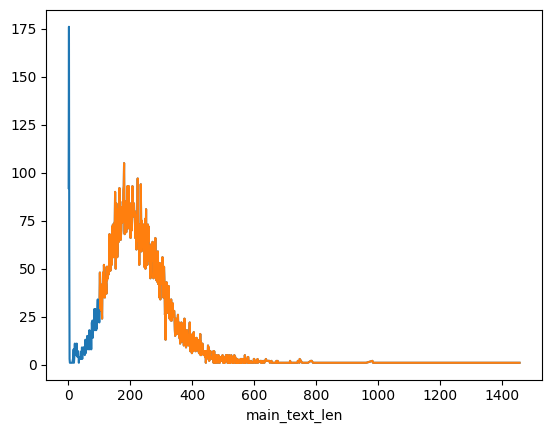

In [8]:
df["main_text_len"] = df["main_text_splitted"].apply(lambda x: len(x))
df.groupby(by="main_text_len").count()["main_text_splitted"].plot()
df = df[(df["main_text_len"]) > 100]
df.reset_index(drop=True, inplace=True)
df.groupby(by="main_text_len").count()["main_text_splitted"].plot()

In [9]:
df["text"] = df.apply(lambda x: concat_cols(x), axis=1)
df = df.drop(["date","category","headers", "main_text_splitted", "main_text_len"], axis=1) #"title", "link"
df.reset_index(drop=True, inplace=True)

df['text'] = df['text'].apply(clean_text)


In [11]:
df['text'][0]

'19 october 2023 the un world meteorological organization wmo said in a new report on thursday that every year around 2000 million tonnes of dust enter the atmosphere darkening skies and harming air quality in regions that can be thousands of kilometres away '

In [12]:
df

,link,title,text
0,https://news.un.org//en/story/2023/10/1142552,"World News in Brief: Sandstorm alert, albinism...",19 october 2023 the un world meteorological or...
1,https://news.un.org//en/story/2023/10/1142552,"World News in Brief: Sandstorm alert, albinism...",19 october 2023 wmo chief petteri taalas said ...
2,https://news.un.org//en/story/2023/10/1142552,"World News in Brief: Sandstorm alert, albinism...",19 october 2023 wmo said that exposure to dust...
3,https://news.un.org//en/story/2023/10/1142552,"World News in Brief: Sandstorm alert, albinism...",19 october 2023 according to wmo in 2022 hotsp...
4,https://news.un.org//en/story/2023/10/1142552,"World News in Brief: Sandstorm alert, albinism...",19 october 2023 prof taalas stressed wmos comm...
...,...,...,...
15862,https://news.un.org//en/story/2004/09/116712-c...,Concerns of island nations top final session o...,30 september 2004 in highlighting the devastat...
15863,https://news.un.org//en/story/2004/09/116712-c...,Concerns of island nations top final session o...,30 september 2004 talbak nazarov foreign minis...
15864,https://news.un.org//en/story/2004/09/116712-c...,Concerns of island nations top final session o...,30 september 2004 surinames foreign minister m...
15865,https://news.un.org//en/story/2004/09/116712-c...,Concerns of island nations top final session o...,30 september 2004 for carlos morales troncoso ...


In [13]:
df.to_csv('../files/preprocessed_articles.csv', index=False)